In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

## Functions

In [2]:
def modelpokemon(name):
    train_ds, val_ds, test_ds = getds(name)
        
    num_classes = len(train_ds.class_names)
    
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    
    model = Sequential([
      layers.Rescaling(1./255, input_shape=(128, 128, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.4),
      layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=50
    )
    test_results = model.evaluate(test_ds, batch_size=128)

    
    return model, history, test_results   
    
def getds(name):
    batch_size = 32
    img_height = 128
    img_width = 128
    
    data_path = os.getcwd() + '\\PokeImages-by-type\\' + name
    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="training",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_path,
      validation_split=0.3,
      subset="validation",
      seed=52,
      image_size=(img_height, img_width),
      batch_size=batch_size)
    
    # https://errorsfixing.com/is-it-possible-to-split-a-tensorflow-dataset-into-train-validation-and-test-datasets-when-using-image_dataset_from_directory/
    split = round(len(val_ds) / 1.5)
    test_ds = val_ds.take(split)
    val_ds = val_ds.skip(split)
    
    return train_ds, val_ds, test_ds
    
def graphmodel(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(history.params['epochs'])

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

## Loop to Generate Model for Each Type

In [3]:
typelist = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost', 
            'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']

In [4]:
%%time

vartracker = []

for poketype in typelist:
    model, history, test_results = modelpokemon(poketype)
    varlist = [poketype, model, history, test_results]
    vartracker.append(varlist)
    model.save(f'models/{poketype}_model')

Found 3062 files belonging to 72 classes.
Using 2144 files for training.
Found 3062 files belonging to 72 classes.
Using 918 files for validation.
Epoch 1/50
67/67 [==============================] - 14s 26ms/step - loss: 4.1485 - accuracy: 0.0476 - val_loss: 4.0122 - val_accuracy: 0.1516
Epoch 2/50
67/67 [==============================] - 1s 10ms/step - loss: 3.4017 - accuracy: 0.1908 - val_loss: 2.7083 - val_accuracy: 0.4129
Epoch 3/50
67/67 [==============================] - 1s 10ms/step - loss: 2.3307 - accuracy: 0.4240 - val_loss: 1.9279 - val_accuracy: 0.6484
Epoch 4/50
67/67 [==============================] - 1s 10ms/step - loss: 1.5463 - accuracy: 0.6087 - val_loss: 1.2151 - val_accuracy: 0.7516
Epoch 5/50
67/67 [==============================] - 1s 10ms/step - loss: 1.0424 - accuracy: 0.7201 - val_loss: 0.9969 - val_accuracy: 0.7968
Epoch 6/50
67/67 [==============================] - 1s 10ms/step - loss: 0.8096 - accuracy: 0.7715 - val_loss: 0.8440 - val_accuracy: 0.8355
Epoch 

INFO:tensorflow:Assets written to: models/Bug_model\assets


INFO:tensorflow:Assets written to: models/Bug_model\assets


Found 1045 files belonging to 29 classes.
Using 732 files for training.
Found 1045 files belonging to 29 classes.
Using 313 files for validation.
Epoch 1/50
23/23 [==============================] - 2s 34ms/step - loss: 3.3393 - accuracy: 0.0874 - val_loss: 3.2350 - val_accuracy: 0.1124
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 3.0330 - accuracy: 0.1817 - val_loss: 2.9797 - val_accuracy: 0.2584
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 2.2642 - accuracy: 0.3907 - val_loss: 1.9580 - val_accuracy: 0.5506
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: 1.3730 - accuracy: 0.6243 - val_loss: 1.2365 - val_accuracy: 0.6854
Epoch 5/50
23/23 [==============================] - 0s 10ms/step - loss: 0.8288 - accuracy: 0.7732 - val_loss: 0.8483 - val_accuracy: 0.7978
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6172 - accuracy: 0.8210 - val_loss: 0.7244 - val_accuracy: 0.8315
Epoch 7/50

INFO:tensorflow:Assets written to: models/Dark_model\assets


INFO:tensorflow:Assets written to: models/Dark_model\assets


Found 1031 files belonging to 27 classes.
Using 722 files for training.
Found 1031 files belonging to 27 classes.
Using 309 files for validation.
Epoch 1/50
23/23 [==============================] - 2s 36ms/step - loss: 3.1543 - accuracy: 0.1330 - val_loss: 2.9788 - val_accuracy: 0.2941
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 2.5327 - accuracy: 0.3186 - val_loss: 2.0072 - val_accuracy: 0.5059
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 1.6055 - accuracy: 0.5416 - val_loss: 1.4501 - val_accuracy: 0.6000
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 0.8857 - accuracy: 0.7701 - val_loss: 1.0113 - val_accuracy: 0.7529
Epoch 5/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5367 - accuracy: 0.8532 - val_loss: 0.7819 - val_accuracy: 0.8235
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.3647 - accuracy: 0.9141 - val_loss: 0.8014 - val_accuracy: 0.8235
Epoch 7/

INFO:tensorflow:Assets written to: models/Dragon_model\assets


INFO:tensorflow:Assets written to: models/Dragon_model\assets


Found 1792 files belonging to 40 classes.
Using 1255 files for training.
Found 1792 files belonging to 40 classes.
Using 537 files for validation.
Epoch 1/50
40/40 [==============================] - 2s 23ms/step - loss: 3.6128 - accuracy: 0.0669 - val_loss: 3.3755 - val_accuracy: 0.1081
Epoch 2/50
40/40 [==============================] - 0s 9ms/step - loss: 3.1275 - accuracy: 0.1681 - val_loss: 2.8061 - val_accuracy: 0.3676
Epoch 3/50
40/40 [==============================] - 0s 9ms/step - loss: 2.2878 - accuracy: 0.3880 - val_loss: 2.1150 - val_accuracy: 0.5081
Epoch 4/50
40/40 [==============================] - 0s 9ms/step - loss: 1.4690 - accuracy: 0.6016 - val_loss: 1.3597 - val_accuracy: 0.6919
Epoch 5/50
40/40 [==============================] - 0s 10ms/step - loss: 0.9274 - accuracy: 0.7371 - val_loss: 1.0451 - val_accuracy: 0.7568
Epoch 6/50
40/40 [==============================] - 0s 9ms/step - loss: 0.7226 - accuracy: 0.7928 - val_loss: 0.9422 - val_accuracy: 0.7892
Epoch 7/50


INFO:tensorflow:Assets written to: models/Electric_model\assets


INFO:tensorflow:Assets written to: models/Electric_model\assets


Found 735 files belonging to 18 classes.
Using 515 files for training.
Found 735 files belonging to 18 classes.
Using 220 files for validation.
Epoch 1/50
17/17 [==============================] - 1s 47ms/step - loss: 2.7793 - accuracy: 0.1786 - val_loss: 2.6415 - val_accuracy: 0.2667
Epoch 2/50
17/17 [==============================] - 0s 9ms/step - loss: 2.3301 - accuracy: 0.2893 - val_loss: 2.1308 - val_accuracy: 0.4167
Epoch 3/50
17/17 [==============================] - 0s 9ms/step - loss: 1.7203 - accuracy: 0.4990 - val_loss: 1.6650 - val_accuracy: 0.6500
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.6835 - val_loss: 1.1658 - val_accuracy: 0.7167
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.7478 - accuracy: 0.7437 - val_loss: 0.9603 - val_accuracy: 0.8167
Epoch 6/50
17/17 [==============================] - 0s 9ms/step - loss: 0.4678 - accuracy: 0.8524 - val_loss: 0.8334 - val_accuracy: 0.8833
Epoch 7/50
17/1

INFO:tensorflow:Assets written to: models/Fairy_model\assets


INFO:tensorflow:Assets written to: models/Fairy_model\assets


Found 1110 files belonging to 29 classes.
Using 777 files for training.
Found 1110 files belonging to 29 classes.
Using 333 files for validation.
Epoch 1/50
25/25 [==============================] - 2s 33ms/step - loss: 3.3399 - accuracy: 0.1004 - val_loss: 3.2471 - val_accuracy: 0.1193
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 3.0178 - accuracy: 0.1532 - val_loss: 2.8901 - val_accuracy: 0.2202
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 2.3414 - accuracy: 0.3308 - val_loss: 2.0133 - val_accuracy: 0.5505
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 1.5084 - accuracy: 0.5766 - val_loss: 1.4085 - val_accuracy: 0.7248
Epoch 5/50
25/25 [==============================] - 0s 10ms/step - loss: 0.9506 - accuracy: 0.7156 - val_loss: 0.9746 - val_accuracy: 0.8257
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.5695 - accuracy: 0.8507 - val_loss: 0.7237 - val_accuracy: 0.8532
Epoch 7/5

INFO:tensorflow:Assets written to: models/Fighting_model\assets


INFO:tensorflow:Assets written to: models/Fighting_model\assets


Found 2177 files belonging to 53 classes.
Using 1524 files for training.
Found 2177 files belonging to 53 classes.
Using 653 files for validation.
Epoch 1/50
48/48 [==============================] - 2s 22ms/step - loss: 3.9165 - accuracy: 0.0348 - val_loss: 3.8147 - val_accuracy: 0.1024
Epoch 2/50
48/48 [==============================] - 0s 10ms/step - loss: 3.3970 - accuracy: 0.1581 - val_loss: 2.9722 - val_accuracy: 0.3415
Epoch 3/50
48/48 [==============================] - 0s 9ms/step - loss: 2.2876 - accuracy: 0.4114 - val_loss: 1.8574 - val_accuracy: 0.6146
Epoch 4/50
48/48 [==============================] - 0s 9ms/step - loss: 1.4093 - accuracy: 0.6417 - val_loss: 1.2587 - val_accuracy: 0.7756
Epoch 5/50
48/48 [==============================] - 0s 10ms/step - loss: 0.8912 - accuracy: 0.7631 - val_loss: 0.9483 - val_accuracy: 0.8195
Epoch 6/50
48/48 [==============================] - 0s 9ms/step - loss: 0.6000 - accuracy: 0.8360 - val_loss: 0.8288 - val_accuracy: 0.8293
Epoch 7/50

INFO:tensorflow:Assets written to: models/Fire_model\assets


INFO:tensorflow:Assets written to: models/Fire_model\assets


Found 967 files belonging to 27 classes.
Using 677 files for training.
Found 967 files belonging to 27 classes.
Using 290 files for validation.
Epoch 1/50
22/22 [==============================] - 2s 23ms/step - loss: 3.2495 - accuracy: 0.0990 - val_loss: 3.1034 - val_accuracy: 0.0152
Epoch 2/50
22/22 [==============================] - 0s 10ms/step - loss: 3.0173 - accuracy: 0.1507 - val_loss: 2.8393 - val_accuracy: 0.3030
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 2.4066 - accuracy: 0.3516 - val_loss: 2.0889 - val_accuracy: 0.4848
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 1.5782 - accuracy: 0.5805 - val_loss: 1.3962 - val_accuracy: 0.7121
Epoch 5/50
22/22 [==============================] - 0s 10ms/step - loss: 0.9064 - accuracy: 0.7430 - val_loss: 1.0340 - val_accuracy: 0.7576
Epoch 6/50
22/22 [==============================] - 0s 10ms/step - loss: 0.5493 - accuracy: 0.8464 - val_loss: 0.8328 - val_accuracy: 0.8030
Epoch 7/50
2

INFO:tensorflow:Assets written to: models/Ghost_model\assets


INFO:tensorflow:Assets written to: models/Ghost_model\assets


Found 2974 files belonging to 78 classes.
Using 2082 files for training.
Found 2974 files belonging to 78 classes.
Using 892 files for validation.
Epoch 1/50
66/66 [==============================] - 2s 18ms/step - loss: 4.2116 - accuracy: 0.0403 - val_loss: 3.9219 - val_accuracy: 0.1338
Epoch 2/50
66/66 [==============================] - 1s 10ms/step - loss: 3.2485 - accuracy: 0.2483 - val_loss: 2.5231 - val_accuracy: 0.4613
Epoch 3/50
66/66 [==============================] - 1s 11ms/step - loss: 2.0604 - accuracy: 0.4909 - val_loss: 1.6705 - val_accuracy: 0.6585
Epoch 4/50
66/66 [==============================] - 1s 9ms/step - loss: 1.3217 - accuracy: 0.6647 - val_loss: 1.1191 - val_accuracy: 0.7676
Epoch 5/50
66/66 [==============================] - 1s 9ms/step - loss: 0.8962 - accuracy: 0.7627 - val_loss: 1.0144 - val_accuracy: 0.8063
Epoch 6/50
66/66 [==============================] - 1s 10ms/step - loss: 0.6143 - accuracy: 0.8290 - val_loss: 0.8600 - val_accuracy: 0.8415
Epoch 7/5

INFO:tensorflow:Assets written to: models/Grass_model\assets


INFO:tensorflow:Assets written to: models/Grass_model\assets


Found 1509 files belonging to 32 classes.
Using 1057 files for training.
Found 1509 files belonging to 32 classes.
Using 452 files for validation.
Epoch 1/50
34/34 [==============================] - 2s 25ms/step - loss: 3.4651 - accuracy: 0.0833 - val_loss: 3.3076 - val_accuracy: 0.1136
Epoch 2/50
34/34 [==============================] - 0s 9ms/step - loss: 2.8986 - accuracy: 0.2091 - val_loss: 2.7649 - val_accuracy: 0.3788
Epoch 3/50
34/34 [==============================] - 0s 9ms/step - loss: 1.8789 - accuracy: 0.4806 - val_loss: 1.9459 - val_accuracy: 0.5909
Epoch 4/50
34/34 [==============================] - 0s 9ms/step - loss: 1.1482 - accuracy: 0.6878 - val_loss: 1.6371 - val_accuracy: 0.6742
Epoch 5/50
34/34 [==============================] - 0s 9ms/step - loss: 0.8010 - accuracy: 0.7824 - val_loss: 1.4306 - val_accuracy: 0.7273
Epoch 6/50
34/34 [==============================] - 0s 9ms/step - loss: 0.5566 - accuracy: 0.8250 - val_loss: 1.1950 - val_accuracy: 0.8030
Epoch 7/50
3

INFO:tensorflow:Assets written to: models/Ground_model\assets


INFO:tensorflow:Assets written to: models/Ground_model\assets


Found 950 files belonging to 23 classes.
Using 665 files for training.
Found 950 files belonging to 23 classes.
Using 285 files for validation.
Epoch 1/50
21/21 [==============================] - 1s 35ms/step - loss: 3.0695 - accuracy: 0.0887 - val_loss: 2.9558 - val_accuracy: 0.1613
Epoch 2/50
21/21 [==============================] - 0s 10ms/step - loss: 2.6525 - accuracy: 0.2436 - val_loss: 2.2525 - val_accuracy: 0.4946
Epoch 3/50
21/21 [==============================] - 0s 10ms/step - loss: 1.7644 - accuracy: 0.4932 - val_loss: 1.2117 - val_accuracy: 0.7419
Epoch 4/50
21/21 [==============================] - 0s 10ms/step - loss: 0.9873 - accuracy: 0.6992 - val_loss: 0.8105 - val_accuracy: 0.7849
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 0.6734 - accuracy: 0.7880 - val_loss: 0.5882 - val_accuracy: 0.8817
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4235 - accuracy: 0.8737 - val_loss: 0.2945 - val_accuracy: 0.9247
Epoch 7/50


INFO:tensorflow:Assets written to: models/Ice_model\assets


INFO:tensorflow:Assets written to: models/Ice_model\assets


Found 4703 files belonging to 105 classes.
Using 3293 files for training.
Found 4703 files belonging to 105 classes.
Using 1410 files for validation.
Epoch 1/50
103/103 [==============================] - 3s 16ms/step - loss: 4.6177 - accuracy: 0.0167 - val_loss: 4.4525 - val_accuracy: 0.0356
Epoch 2/50
103/103 [==============================] - 1s 9ms/step - loss: 4.1798 - accuracy: 0.0777 - val_loss: 3.7785 - val_accuracy: 0.1822
Epoch 3/50
103/103 [==============================] - 1s 9ms/step - loss: 3.3460 - accuracy: 0.2144 - val_loss: 2.7295 - val_accuracy: 0.4111
Epoch 4/50
103/103 [==============================] - 1s 9ms/step - loss: 2.4374 - accuracy: 0.3975 - val_loss: 2.0587 - val_accuracy: 0.5733
Epoch 5/50
103/103 [==============================] - 1s 9ms/step - loss: 1.8364 - accuracy: 0.5251 - val_loss: 1.6466 - val_accuracy: 0.6578
Epoch 6/50
103/103 [==============================] - 1s 9ms/step - loss: 1.4698 - accuracy: 0.6134 - val_loss: 1.2638 - val_accuracy: 0.73

INFO:tensorflow:Assets written to: models/Normal_model\assets


INFO:tensorflow:Assets written to: models/Normal_model\assets


Found 1567 files belonging to 34 classes.
Using 1097 files for training.
Found 1567 files belonging to 34 classes.
Using 470 files for validation.
Epoch 1/50
35/35 [==============================] - 2s 22ms/step - loss: 3.4987 - accuracy: 0.0638 - val_loss: 3.4161 - val_accuracy: 0.0733
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 3.2798 - accuracy: 0.1103 - val_loss: 3.2081 - val_accuracy: 0.1933
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 2.6734 - accuracy: 0.2671 - val_loss: 2.4035 - val_accuracy: 0.4133
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 1.8745 - accuracy: 0.4923 - val_loss: 1.7671 - val_accuracy: 0.6200
Epoch 5/50
35/35 [==============================] - 0s 9ms/step - loss: 1.2365 - accuracy: 0.6509 - val_loss: 1.3064 - val_accuracy: 0.7533
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.8728 - accuracy: 0.7593 - val_loss: 1.1571 - val_accuracy: 0.7800
Epoch 7/50
3

INFO:tensorflow:Assets written to: models/Poison_model\assets


INFO:tensorflow:Assets written to: models/Poison_model\assets


Found 2252 files belonging to 53 classes.
Using 1577 files for training.
Found 2252 files belonging to 53 classes.
Using 675 files for validation.
Epoch 1/50
50/50 [==============================] - 2s 22ms/step - loss: 3.9028 - accuracy: 0.0843 - val_loss: 3.6693 - val_accuracy: 0.2513
Epoch 2/50
50/50 [==============================] - 1s 12ms/step - loss: 3.1187 - accuracy: 0.2422 - val_loss: 2.3623 - val_accuracy: 0.4769
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 2.0298 - accuracy: 0.5029 - val_loss: 1.6090 - val_accuracy: 0.6051
Epoch 4/50
50/50 [==============================] - 1s 12ms/step - loss: 1.2826 - accuracy: 0.6620 - val_loss: 1.1243 - val_accuracy: 0.7692
Epoch 5/50
50/50 [==============================] - 1s 11ms/step - loss: 0.8783 - accuracy: 0.7666 - val_loss: 0.8122 - val_accuracy: 0.8410
Epoch 6/50
50/50 [==============================] - 1s 11ms/step - loss: 0.6193 - accuracy: 0.8199 - val_loss: 0.6609 - val_accuracy: 0.8410
Epoch 7

INFO:tensorflow:Assets written to: models/Psychic_model\assets


INFO:tensorflow:Assets written to: models/Psychic_model\assets


Found 1824 files belonging to 46 classes.
Using 1277 files for training.
Found 1824 files belonging to 46 classes.
Using 547 files for validation.
Epoch 1/50
40/40 [==============================] - 2s 22ms/step - loss: 3.7489 - accuracy: 0.0486 - val_loss: 3.6387 - val_accuracy: 0.1411
Epoch 2/50
40/40 [==============================] - 0s 9ms/step - loss: 3.1608 - accuracy: 0.1973 - val_loss: 2.6359 - val_accuracy: 0.4540
Epoch 3/50
40/40 [==============================] - 0s 9ms/step - loss: 1.9597 - accuracy: 0.4926 - val_loss: 1.5529 - val_accuracy: 0.6994
Epoch 4/50
40/40 [==============================] - 0s 9ms/step - loss: 1.1317 - accuracy: 0.6954 - val_loss: 0.9288 - val_accuracy: 0.7975
Epoch 5/50
40/40 [==============================] - 0s 9ms/step - loss: 0.7352 - accuracy: 0.8019 - val_loss: 0.7445 - val_accuracy: 0.8650
Epoch 6/50
40/40 [==============================] - 0s 9ms/step - loss: 0.4436 - accuracy: 0.8747 - val_loss: 0.7165 - val_accuracy: 0.8712
Epoch 7/50
4

INFO:tensorflow:Assets written to: models/Rock_model\assets


INFO:tensorflow:Assets written to: models/Rock_model\assets


Found 874 files belonging to 26 classes.
Using 612 files for training.
Found 874 files belonging to 26 classes.
Using 262 files for validation.
Epoch 1/50
20/20 [==============================] - 1s 34ms/step - loss: 3.2976 - accuracy: 0.0899 - val_loss: 3.1247 - val_accuracy: 0.0857
Epoch 2/50
20/20 [==============================] - 0s 11ms/step - loss: 2.9344 - accuracy: 0.1601 - val_loss: 2.9623 - val_accuracy: 0.0857
Epoch 3/50
20/20 [==============================] - 0s 10ms/step - loss: 2.3931 - accuracy: 0.3317 - val_loss: 2.1970 - val_accuracy: 0.4286
Epoch 4/50
20/20 [==============================] - 0s 10ms/step - loss: 1.5861 - accuracy: 0.5490 - val_loss: 1.7209 - val_accuracy: 0.5571
Epoch 5/50
20/20 [==============================] - 0s 10ms/step - loss: 1.0256 - accuracy: 0.7173 - val_loss: 1.0668 - val_accuracy: 0.7571
Epoch 6/50
20/20 [==============================] - 0s 10ms/step - loss: 0.5492 - accuracy: 0.8448 - val_loss: 0.8882 - val_accuracy: 0.8286
Epoch 7/50

INFO:tensorflow:Assets written to: models/Steel_model\assets


INFO:tensorflow:Assets written to: models/Steel_model\assets


Found 5305 files belonging to 114 classes.
Using 3714 files for training.
Found 5305 files belonging to 114 classes.
Using 1591 files for validation.
Epoch 1/50
117/117 [==============================] - 3s 16ms/step - loss: 4.6886 - accuracy: 0.0275 - val_loss: 4.4779 - val_accuracy: 0.1028
Epoch 2/50
117/117 [==============================] - 1s 9ms/step - loss: 3.8653 - accuracy: 0.1645 - val_loss: 3.1248 - val_accuracy: 0.3439
Epoch 3/50
117/117 [==============================] - 1s 9ms/step - loss: 2.5168 - accuracy: 0.4155 - val_loss: 2.0689 - val_accuracy: 0.5682
Epoch 4/50
117/117 [==============================] - 1s 9ms/step - loss: 1.6926 - accuracy: 0.5848 - val_loss: 1.5428 - val_accuracy: 0.7234
Epoch 5/50
117/117 [==============================] - 1s 9ms/step - loss: 1.1013 - accuracy: 0.7189 - val_loss: 1.1455 - val_accuracy: 0.7888
Epoch 6/50
117/117 [==============================] - 1s 9ms/step - loss: 0.8014 - accuracy: 0.7835 - val_loss: 1.0400 - val_accuracy: 0.82

INFO:tensorflow:Assets written to: models/Water_model\assets


INFO:tensorflow:Assets written to: models/Water_model\assets


Wall time: 7min 33s


In [5]:
vartracker[0]

['Bug',
 [1.0244619846343994, 0.8996710777282715]]

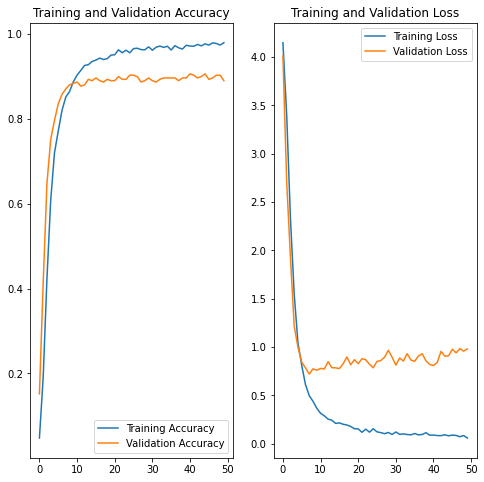

In [6]:
graphmodel(vartracker[0][2])